## Reddit data extraction - Reminder - change the csv name every day you collect data

In [54]:
CLIENT_ID ='*****'
SECRET_TOKEN ='********'

In [55]:
import requests

# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth(CLIENT_ID, SECRET_TOKEN)

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'Anita_7777',
        'password': '******'}

# setup our header info, which gives reddit a brief description of our app
headers  = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}


#view raw
res = requests.post('https://www.reddit.com/api/v1/access_token',auth=auth, data=data, headers=headers)

In [56]:
TOKEN = res.json()['access_token']

In [57]:
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
# res = requests.get('https://oauth.reddit.com/r/Global Warming', headers=headers
#https://www.reddit.com/r/DamnNatureYouScary/
res = requests.get('https://oauth.reddit.com/r/DamnNatureYouScary/hot', headers=headers, params= {'limit': '100'})

In [58]:
res.json()

{'kind': 'Listing',
 'data': {'after': 't3_yauvl4',
  'dist': 100,
  'modhash': None,
  'geo_filter': None,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'DamnNatureYouScary',
     'selftext': '',
     'author_fullname': 't2_scmr3sb1',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'Just a nice egg breakfast with a side of natural disaster.',
     'link_flair_richtext': [{'e': 'text', 't': 'Natural Disasters'}],
     'subreddit_name_prefixed': 'r/DamnNatureYouScary',
     'hidden': False,
     'pwls': None,
     'link_flair_css_class': '',
     'downs': 0,
     'thumbnail_height': 140,
     'top_awarded_type': None,
     'hide_score': False,
     'name': 't3_11qqxjs',
     'quarantine': False,
     'link_flair_text_color': 'dark',
     'upvote_ratio': 0.97,
     'author_flair_background_color': None,
     'ups': 335,
     'total_awards_received': 0,
     'media_embed': {},
     'thumbnai

In [59]:
all = []
for post in res.json()['data']['children']:

    post_dict = {'Post': post['data']['title'], 'Label': post['data']['subreddit']}
    all.append(post_dict)
    # print(post['data']['title'])

In [60]:
import pandas as pd
df = pd.DataFrame(all)
df.to_csv('DamnNatureYouScary1.csv', index= False)

### newsapi

In [75]:
import pprint
import requests

In [76]:
url = 'https://newsapi.org/v2/everything?'

In [6]:
!pip install newsapi-python

zsh:1: /opt/homebrew/bin/pip: bad interpreter: /opt/homebrew/opt/python@3.9/bin/python3.9: no such file or directory


In [77]:
secret = '*******'
topic = 'disaster'
parameters = {
    'q': topic, # query phrase
    'pageSize': 100,  # maximum is 100
    'apiKey': secret # your own API key
}

In [78]:
response = requests.get(url, params=parameters)

# Convert the response to JSON format and pretty print it
response_json = response.json()
pprint.pprint(response_json)

{'articles': [{'author': 'Daniel Oropeza',
               'content': 'Floods are the most expensive natural disaster in '
                          'the United States, costing over $1 trillion since '
                          '1980 (when you take inflation into account), '
                          'according to Flood Defenders. And while many people '
                          'us… [+3896 chars]',
               'description': 'Floods are the most expensive natural disaster '
                              'in the United States, costing over $1 trillion '
                              'since 1980 (when you take inflation into '
                              'account), according to Flood Defenders. And '
                              'while many people use FEMA flood maps to check '
                              'whether their home has a high flo…',
               'publishedAt': '2023-03-13T15:00:00Z',
               'source': {'id': None, 'name': 'Lifehacker.com'},
               'tit

               'publishedAt': '2023-03-01T16:00:18Z',
               'source': {'id': None, 'name': 'The Guardian'},
               'title': 'Ohio senators introduce safety rules after toxic '
                        'train derailment disaster',
               'url': 'https://www.theguardian.com/us-news/2023/mar/01/ohio-train-derailment-disaster-senators-introduce-safety-rules',
               'urlToImage': 'https://i.guim.co.uk/img/media/80af29ce1c919ba2670a323bbbf39d35bba2b323/0_0_3500_2101/master/3500.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=cd7f495499f41eda53ccd7777827cc75'},
              {'author': 'Natalie Haynes',
               'content': 'The first sign was smoke rising from the mountain '
                          'and it was Plinys mother who noticed it. They didnt '
                          'know which mountain this cloud came fro

In [79]:
combine_dict = []

for i in response_json['articles']:
    # print(i['title'])
    API_news_list = {"Description": i['description'], "Label": topic}
    combine_dict.append(API_news_list)

In [80]:
import pandas as pd
my_df = pd.DataFrame(combine_dict)
my_df.to_csv("News_on_" + topic + ".csv", index = False)


In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [82]:
text_combined = ''
# Loop through all the headlines and add them to 'text_combined' 
for i in response_json['articles']:
    text_combined += i['description'] + ' ' # add a space after every headline, so the first and last words are not glued together
# Print the first 300 characters to screen for inspection
print(text_combined[0:300])


Floods are the most expensive natural disaster in the United States, costing over $1 trillion since 1980 (when you take inflation into account), according to Flood Defenders. And while many people use FEMA flood maps to check whether their home has a high flo… People living in and near East Palestin


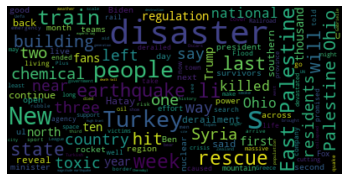

In [83]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [24]:
my_df

,Description,Label
0,"The men, including two teenagers, were saved a...",natural disaster
1,"Ten days after disaster, grief is being subsum...",natural disaster
2,The UN's delay in sending aid to Syrian victim...,natural disaster
3,“People usually don’t recover from disasters. ...,natural disaster
4,Senior politicians are urging the prime minist...,natural disaster
...,...,...
95,The Chinese embassy in France was slammed for ...,natural disaster
96,"Every four years when I was growing up, my\nmo...",natural disaster
97,Last month’s toxic train disaster in Ohio was ...,natural disaster
98,A special sporting event requires a special su...,natural disaster


In [66]:
#import packages
import requests  
import re  
import pandas as pd  

import numpy as np   
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer
#install and import tweepy package, An easy-to-use Python library for accessing the Twitter API.
import tweepy as tw
#Authentication is handled by the tweepy.AuthHandler class
from tweepy import OAuthHandler

from nltk.corpus import stopwords
from nltk import trigrams
import string
import nltk
from nltk.stem.porter import *
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [67]:
consumer_key = '******'
consumer_secret = '*****'
#An Access Token and Secret are user-specific credentials used to authenticate OAuth 1.0a API requests.
#They specify the Twitter account the request is made on behalf of.
access_token = '*******'
access_token_secret = '*****'

"consumer_key = 'NyQBtknVhlawfG9ht9trqQH3G'\nconsumer_secret ='efNMSXg2wscFVSJ3ryVI3dStkd8f2VYyCADkKQuH3q6AdmmZ2P'\naccess_token = '1623098681468792832-WAukJ5f3wPP2Ak2Izur2Y8dDhirUQq'\naccess_token_secret = 'sb2IpnSnXxhgrdfE1PwWsA1YrBtFKbnceVGH6SYOw4DIY'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)   \nauth.set_access_token(access_token, access_token_secret) \n  \n# Creating an API object \napi = tweepy.API(auth)"

In [70]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
#set and get access
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)
#defining a dataframe
topics1=["disaster"]
df = pd.DataFrame()
for topic in topics1:

    try:
#In order to perform pagination we must supply a page/cursor parameter with each of our requests.
#api.search_tweets allows us to search for tweets with respect to the following parameters
        tweets=tw.Cursor(api.search_tweets,q=topic +" -filter:retweets",lang='en',count=10 ).items(5000)
#storing the required objects from twitter API into the dataframe
        for tweet in tweets:
            df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
    except BaseException as e:
        print('failed on_status,',str(e))
df.shape
print(df)

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

Rate limit reached. Sleeping for: 816
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

         LABEL                                               Text
0     disaster  @NorthernDutch @Rep_Peltola That is very true....
1     disaster  @brownecfm @GerardoRiordan8 Exactly! We are pr...
2     disaster  Rhenus is proud to be putting #innovation to t...
3     disaster  @Justin_G0rd0n Complete disaster and it really...
4     disaster  He is so beautiful in the purple light despite...
...        ...                                                ...
4995  disaster  @subarusrighteye Shoten, and CLAMP Laboratory,...
4996  disaster  Sebastian, Ominis, and MC being wholesome trio...
4997  disaster  @Angie14450447 @BigJumah @onjezani Apparently ...
4998  disaster  @IAM_MRIGWE @Blue_Footy You can’t play tgem to...
4999  disaster  #SalmanKhan Last Disaster\n16 Oct 2009\n#MainA...

[5000 rows x 2 columns]


/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'LABEL': topic,'Text': tweet._json['text']}, ignore_index=True)
/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_20180/95170187.py:16: FutureWarning: The frame.append

In [71]:
df.head()

,LABEL,Text
0,disaster,@NorthernDutch @Rep_Peltola That is very true....
1,disaster,@brownecfm @GerardoRiordan8 Exactly! We are pr...
2,disaster,Rhenus is proud to be putting #innovation to t...
3,disaster,@Justin_G0rd0n Complete disaster and it really...
4,disaster,He is so beautiful in the purple light despite...


In [72]:
df['LABEL']

0       disaster
1       disaster
2       disaster
3       disaster
4       disaster
          ...   
4995    disaster
4996    disaster
4997    disaster
4998    disaster
4999    disaster
Name: LABEL, Length: 5000, dtype: object

In [73]:
df.to_csv("tweets_on" + "disaster" + ".csv", index = False)

In [74]:
len(df)

5000